# Sarcasm Detection with Bidirectional LSTM

### Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'Data.csv'

In [5]:
df= pd.read_csv('Data.csv')

In [6]:
df.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",Sarcastic
2,New Emails Reveal Warm Relationship Between Ka...,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,Non Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic


### Print some of the Headlines along with the target

In [8]:
print(df.head())

                                           headlines         target
0  CNN Triumphs (At Least in Most Demographic Cat...  Non Sarcastic
1  ‘You Did The Best You Could,’ Says Iron Man Ac...      Sarcastic
2  New Emails Reveal Warm Relationship Between Ka...  Non Sarcastic
3  Donald Trump Jr. Gets Slammed Over Racist Birt...  Non Sarcastic
4      God Urges Rick Perry Not To Run For President      Sarcastic


### Check Info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12506 entries, 0 to 12505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  12506 non-null  object
 1   target     12506 non-null  object
dtypes: object(2)
memory usage: 195.5+ KB


### View basic statistical information about the dataset

In [12]:
df.describe()

,headlines,target
count,12506,12506
unique,12506,2
top,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
freq,1,6531


### Check for missing values

In [14]:
df.isna().sum()

headlines    0
target       0
dtype: int64

In [15]:
df.isna().sum()

headlines    0
target       0
dtype: int64

### Check for duplicates

In [17]:
df.duplicated().sum()

0

### Plot a countplot of the Class Index

C:\Users\DELL\AppData\Local\Temp\ipykernel_3132\3745497808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='target', order=df['target'].value_counts().index, palette="viridis")


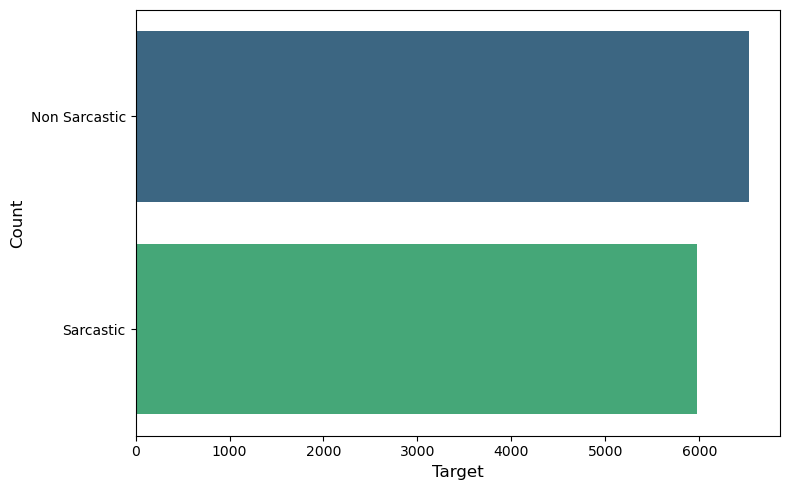

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='target', order=df['target'].value_counts().index, palette="viridis")

# Add title and labels
plt.xlabel("Target", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

### Create a funciton to preprocess the text

In [21]:
def preprocess(sentence):
    sentence = sentence.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", ' ', sentence).split()
    
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

### Apply the preprocess function to the description

In [23]:
df['headlines'] = df['headlines'].apply(preprocess)

In [24]:
for i in range(5):
    print(df['headlines'][i],'--',df['headlines'][i])
    print()

cnn triumph at least in most demographic category -- cnn triumph at least in most demographic category

you did the best you could say iron man action figure voiced by despondent toy r u ceo packing up office -- you did the best you could say iron man action figure voiced by despondent toy r u ceo packing up office

new email reveal warm relationship between kamala harris and big tech -- new email reveal warm relationship between kamala harris and big tech

donald trump jr get slammed over racist birtherism bot attack on kamala harris -- donald trump jr get slammed over racist birtherism bot attack on kamala harris

god urge rick perry not to run for president -- god urge rick perry not to run for president



### Split Input & Target Variables

In [26]:
x = df['headlines']
y = df['target']

### One Hot encode our Target Variable

In [28]:
 y = y.eq('Sarcastic').astype(int)

In [29]:
y

0        0
1        1
2        0
3        0
4        1
        ..
12501    0
12502    1
12503    1
12504    0
12505    1
Name: target, Length: 12506, dtype: int32

### Split the dataset into Training & Testing Set

In [31]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

### Create a keras Tokenizer object

In the Keras library, the Tokenizer is a class that can be used to preprocess text data. It allows you to convert a collection of text documents into a numerical representation that can be used as input to a machine learning model.

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)


### fit on text for our X

In [36]:
tokenizer.fit_on_texts(x_train)


In [37]:
vocab = len(tokenizer.word_index)+1
vocab

13895

In [38]:
x_train

7636     megan fox and machine gun kelly take couple qu...
11526    van jones tough guy trumpzilla ha become presi...
4499                fellow eighth grader we need your vote
7517                                watch stewart mock cnn
6083     cdc warns going unvaccinated not worth risk of...
                               ...                        
5357        dallas cop plant black suspect at murder scene
7565             cnn poll black support shift toward obama
2243     bp s hayward replaced by dudley given new job ...
8619     joe biden get a rocky welcome to the 2020 camp...
12269      just how many campus shooting before we wake up
Name: headlines, Length: 10004, dtype: object

In [39]:
def gg(x):
    x = tokenizer.texts_to_sequences(x)
    x = pad_sequences(x,maxlen=128,padding='post')
    return x
x_train = gg(x_train)
x_test = gg(x_test)

In [40]:
x_train

array([[  74,   13, 1087, ...,    0,    0,    0],
       [ 869,  726, 1356, ...,    0,    0,    0],
       [3315, 1154,  104, ...,    0,    0,    0],
       ...,
       [1478,    3, 3672, ...,    0,    0,    0],
       [ 170,   64,   37, ...,    0,    0,    0],
       [  48,   65,  532, ...,    0,    0,    0]])

### Create a function to convert text to numerical representation and add padding

In [42]:
x_train

array([[  74,   13, 1087, ...,    0,    0,    0],
       [ 869,  726, 1356, ...,    0,    0,    0],
       [3315, 1154,  104, ...,    0,    0,    0],
       ...,
       [1478,    3, 3672, ...,    0,    0,    0],
       [ 170,   64,   37, ...,    0,    0,    0],
       [  48,   65,  532, ...,    0,    0,    0]])

### Apply the function to our X_train & X_test

### Create keras Sequential model with GRU Layers

In [45]:
model = Sequential()

model.add(layers.Embedding(vocab, 128,input_shape=(5000,)))

model.add(layers.Bidirectional(layers.GRU(128, return_sequences=True)))
model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.GRU(128)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation = 'sigmoid'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5000, 128)           │       1,778,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 5000, 256)           │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5000, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         296,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,273,409 (8.67 MB)

 Trainable params: 2,273,409 (8.67 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [77]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

### Train the model with our Training Set

In [80]:
model.fit(x_train, y_train, epochs = 10, validation_split=0.05)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 195s 589ms/step - accuracy: 0.7932 - loss: 0.4123 - val_accuracy: 0.9102 - val_loss: 0.2349
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 165s 556ms/step - accuracy: 0.9570 - loss: 0.1186 - val_accuracy: 0.8962 - val_loss: 0.2494
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 164s 551ms/step - accuracy: 0.9756 - loss: 0.0661 - val_accuracy: 0.8922 - val_loss: 0.3558
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 171s 577ms/step - accuracy: 0.9903 - loss: 0.0283 - val_accuracy: 0.8782 - val_loss: 0.4596
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 199s 670ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.8723 - val_loss: 0.5573
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 155s 522ms/step - accuracy: 0.9972 - loss: 0.0080 - val_accuracy: 0.8962 - val_loss: 0.4896
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 156s 525ms/step - accuracy: 0.9961 - loss: 0.0127 - val_accuracy: 0.8942 - val_loss: 0.6066
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 156s 526ms/step - accuracy: 0.9981 -

### Make predictions with Test set

In [683]:
y_pred = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step


In [684]:
y_pred = [np.argmax(i) for i in y_pred]

### Check accuracy score

In [686]:
accuracy_score(y_test,y_pred)

0.521982414068745

### Confusion matrix

<Axes: >

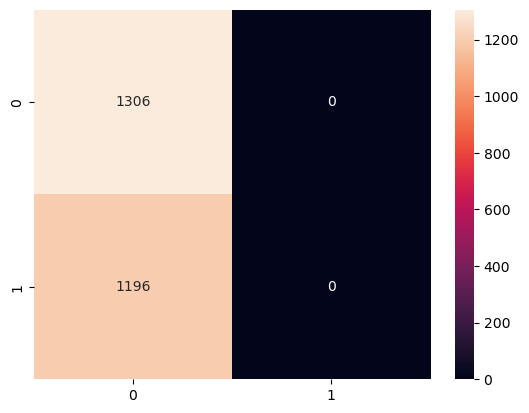

In [688]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Classification Report

In [690]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69      1306
           1       0.00      0.00      0.00      1196

    accuracy                           0.52      2502
   macro avg       0.26      0.50      0.34      2502
weighted avg       0.27      0.52      0.36      2502



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***